In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv("../dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Imputing column minimum 0 value to mean value

In this columns "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin" we have minimum value as 0. This can not happen in real senario there must be some value more than 0 it can not be only 0. So we can replace this minimum value 0 to mean of there respective columns.

In [5]:
df["Pregnancies"] = df["Pregnancies"].replace(0,df["Pregnancies"].mean())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis

### Outlier Treatment

<Axes: >

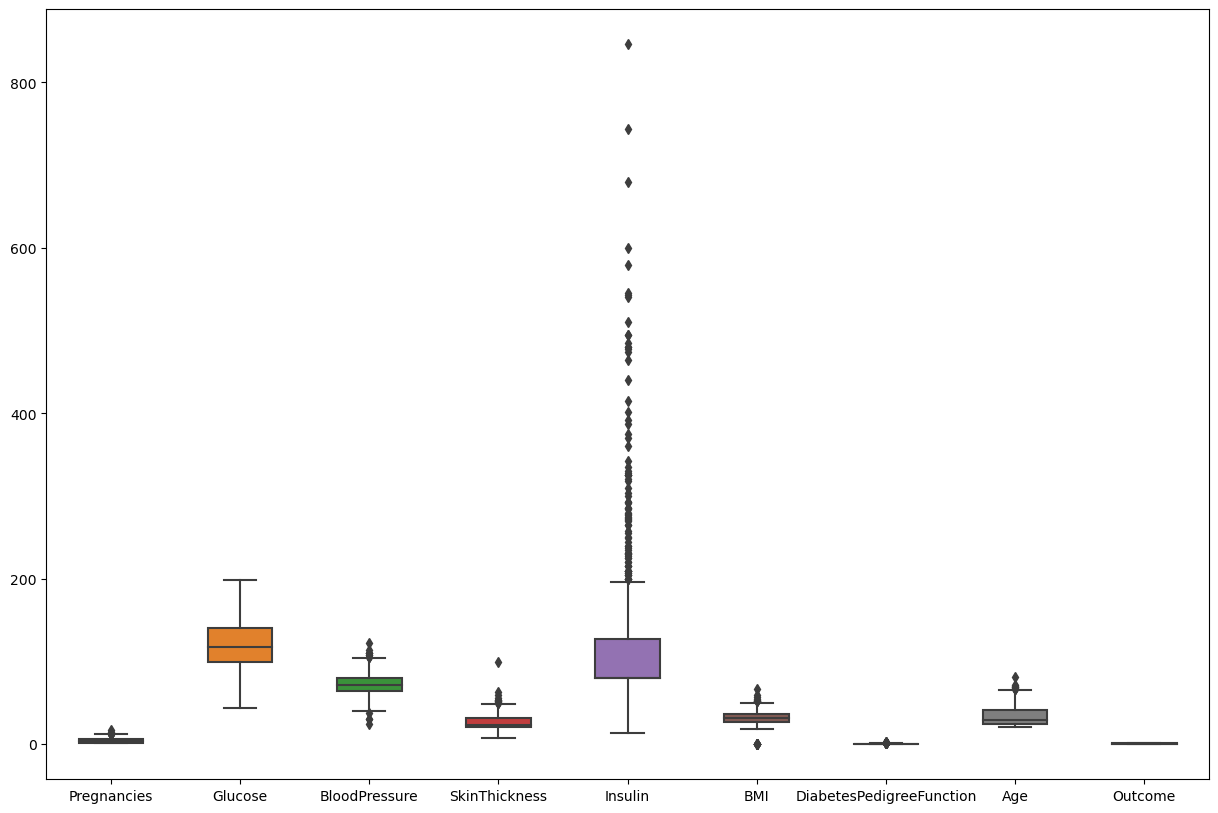

In [7]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax,fliersize=5,width=0.5)

### Summary : 
#### We have an outlier in almost all the column except one or two column.
#### We need to impute them with their mean or median value.

In [8]:
df.iloc[:,:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [9]:
def outlier_treatment(col_name):
    q1,q3 = df[col_name].quantile([0.25,0.75])
    iqr = q3 - q1
    
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # df_copy[col_name].mean()
    # df_copy[col_name].apply(lmabda x : x > lower_whisker & x < upper_whisker )
    df.loc[(df[col_name] < lower_whisker) | (df[col_name] > upper_whisker),col_name] = df[col_name].mean()

In [10]:
for col in list(df.iloc[:,:-1].columns): 
    outlier_treatment(col)

<Axes: >

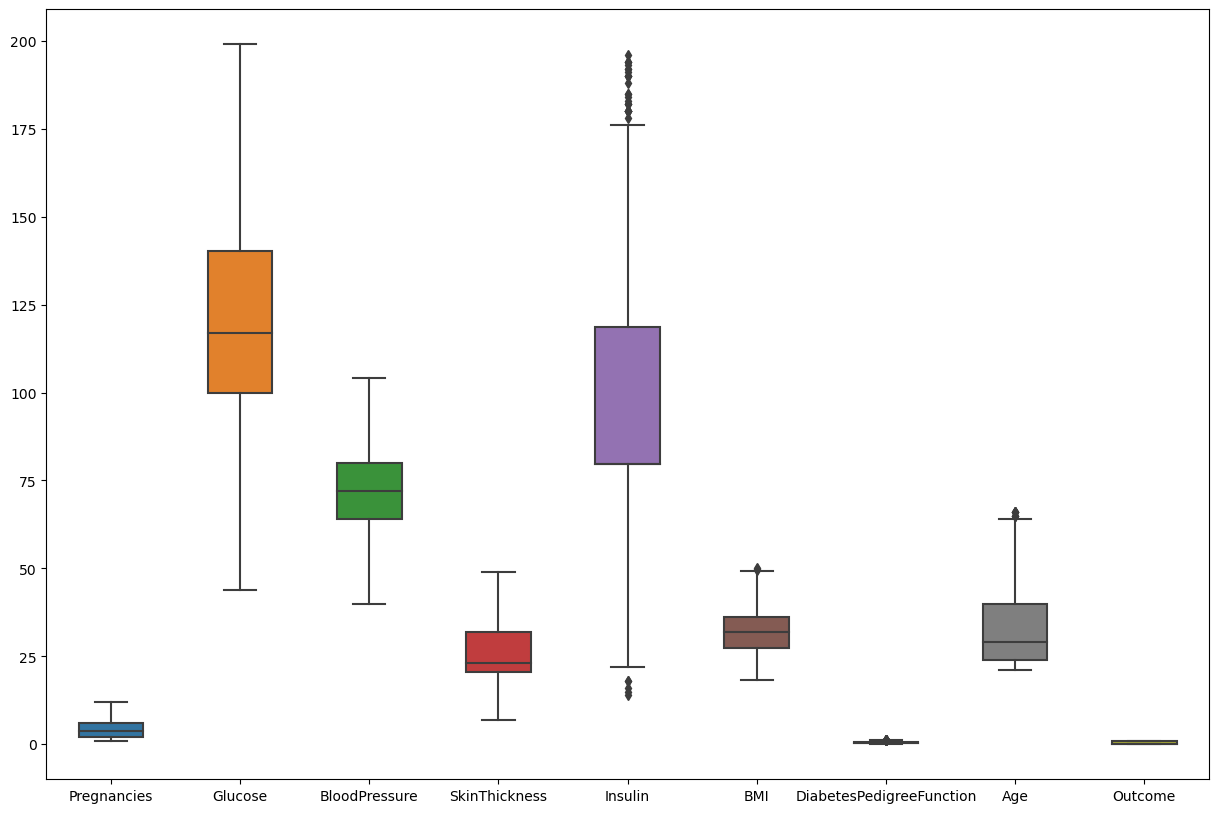

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax,fliersize=5,width=0.5)

### Correlation of columns

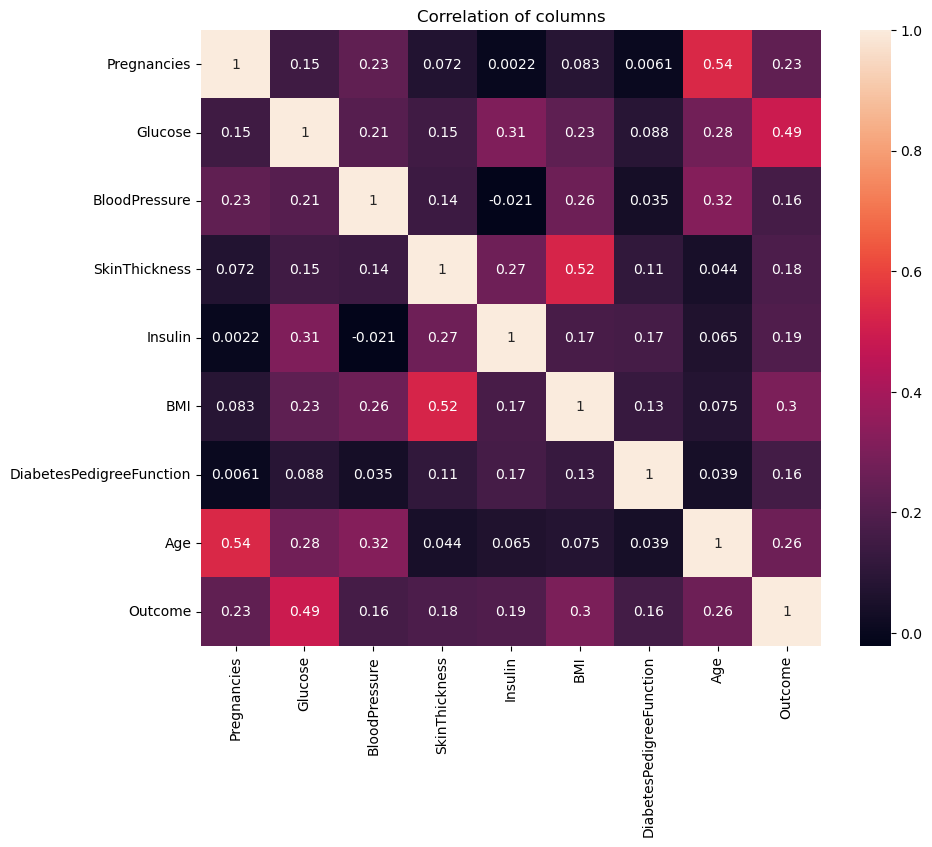

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation of columns")
plt.show()

### Density or Hist plot for all features

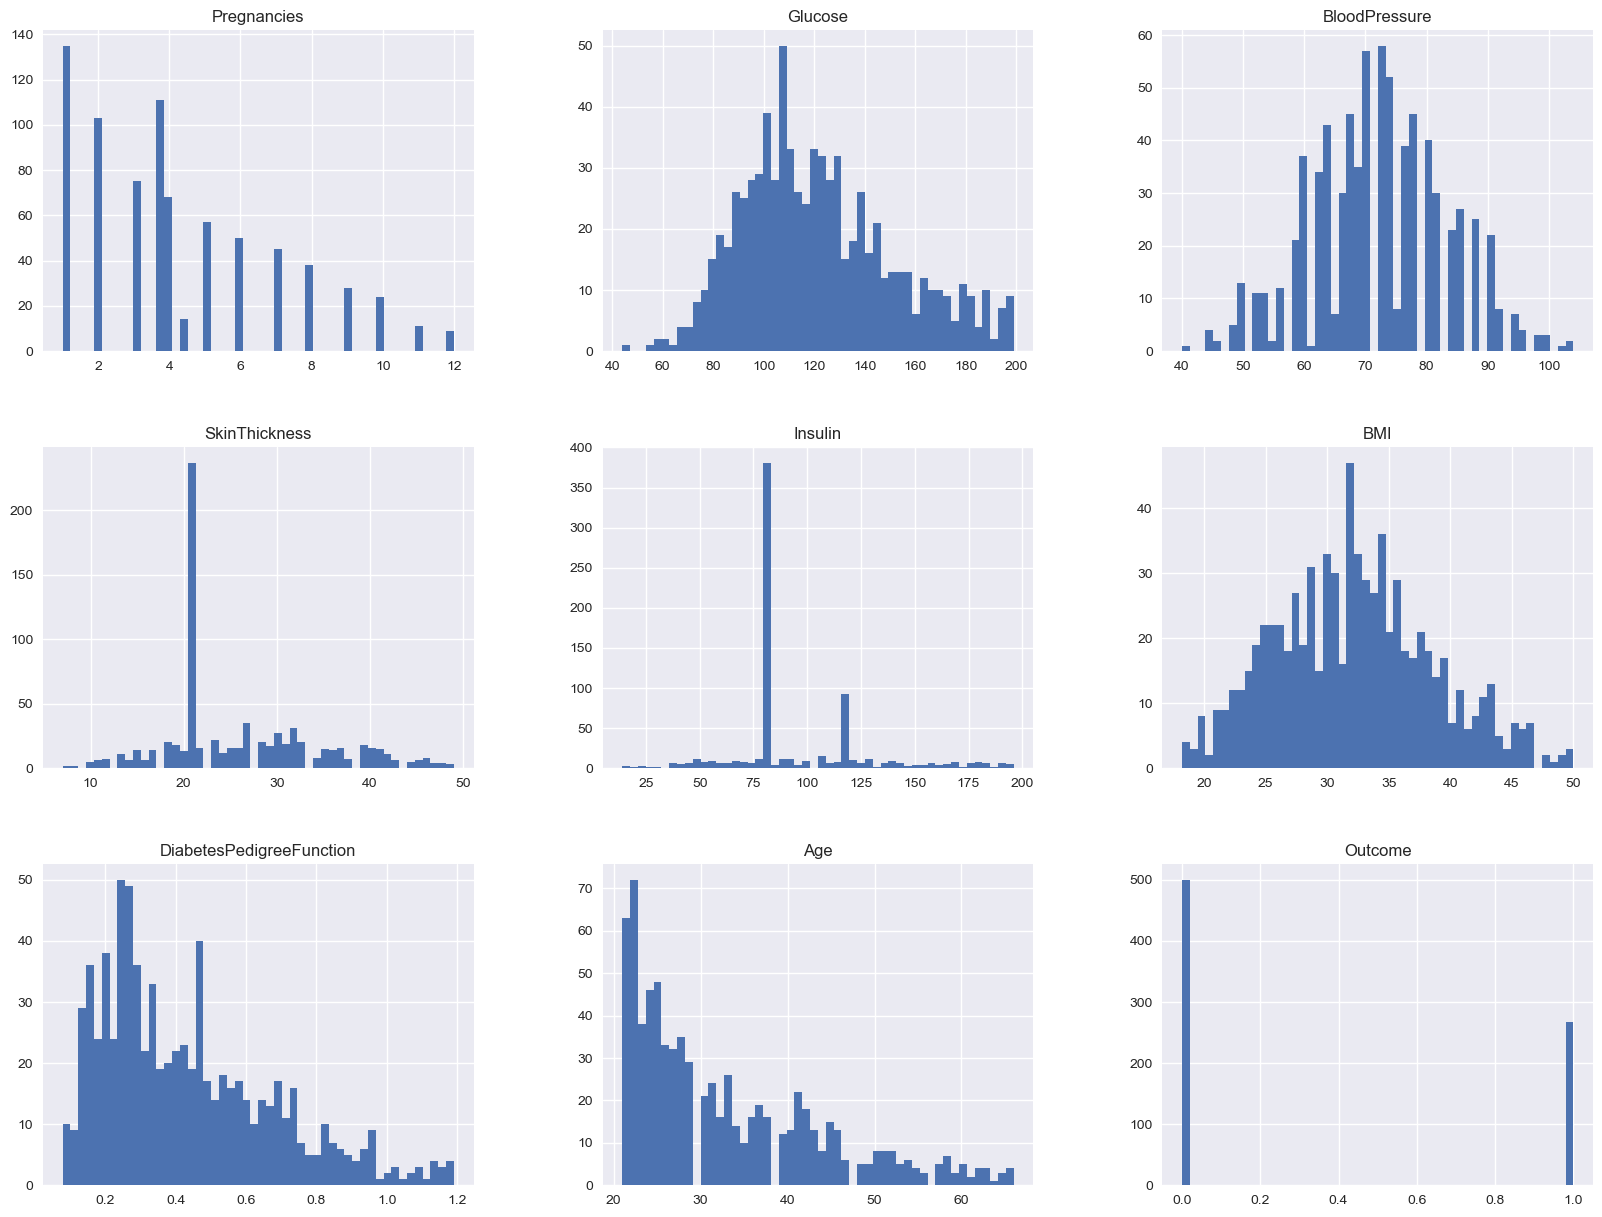

In [13]:
plt.style.use("seaborn-v0_8")
df.hist(bins=50,figsize=(20,15))
plt.show()

## Train Test and Split the data

In [14]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
import pickle

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

## Hyperparameter Tuning Using GridSearch CV

In [19]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action="ignore")

parameters = {
    "penalty":["none","l2"],
    "C":np.logspace(-3,3,7),
    "solver":["newton-cg","lbfgs","liblinear"]
}

In [20]:
clf = GridSearchCV(log_reg,param_grid=parameters,scoring="accuracy",cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [21]:
clf.best_params_

{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}

In [22]:
clf.best_score_

0.774107683000605

In [23]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [24]:
y_pred = clf.predict(X_test_scaled)

In [25]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[112,  18],
       [ 29,  33]], dtype=int64)

In [26]:
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

In [27]:
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
Accuracy

0.7552083333333334

In [28]:
Precision = true_positive / (true_positive + false_positive)
Precision

0.8615384615384616

In [29]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.7943262411347518

In [30]:
F1_Score = (1 + 1**2 ) * (Precision * Recall) / (Precision + Recall)
F1_Score

0.826568265682657

In [33]:
scaler_file = open("../models/StandardScaler.pkl","wb")
pickle.dump(scaler,scaler_file)
file.close()

file = open("../models/Prediction_Model.pkl","wb")
pickle.dump(log_reg,file)
file.close()